In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
mydata= pd.read_csv('/content/sample_data/students.csv')
mydata.head(10)


,SchoolType,Age,Gender,Eng,Thai,Social,Math,Sci,Passed
0,Public,17,F,26,19,33,34,20,No
1,Public,18,M,33,50,50,15,19,No
2,Public,16,F,26,19,33,25,31,No
3,Public,16,F,55,55,60,22,27,No
4,Public,16,M,21,19,60,20,32,No
5,Public,16,M,40,55,21,29,39,No
6,Public,16,F,26,40,33,15,23,No
7,Public,16,F,39,19,40,20,18,No
8,Public,16,F,28,60,23,22,26,No
9,Public,16,F,35,45,30,17,30,No


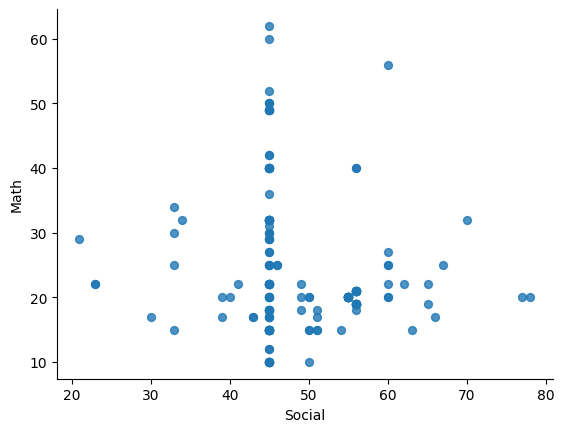

In [ ]:
# @title Social vs Math

from matplotlib import pyplot as plt
mydata.plot(kind='scatter', x='Social', y='Math', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

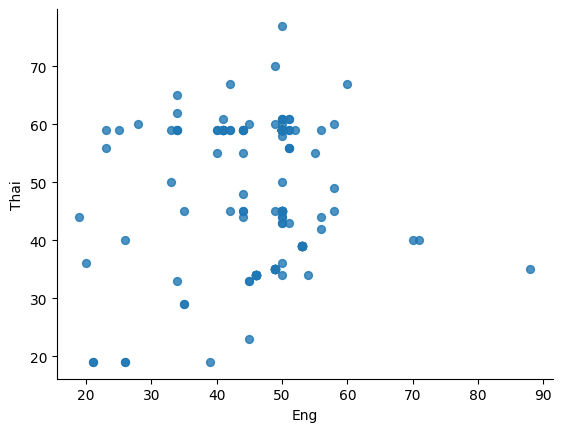

In [ ]:
# @title Eng vs Thai

from matplotlib import pyplot as plt
mydata.plot(kind='scatter', x='Eng', y='Thai', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

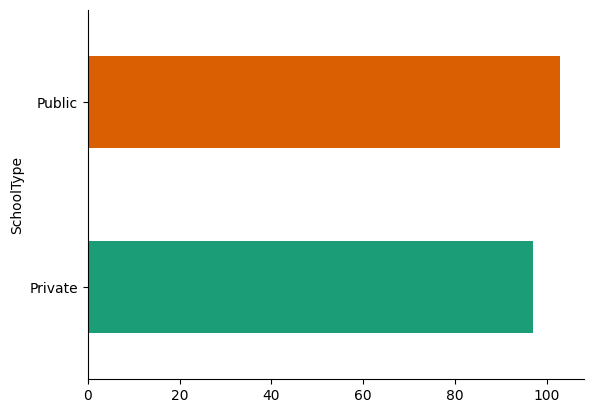

In [ ]:
# @title SchoolType

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('SchoolType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

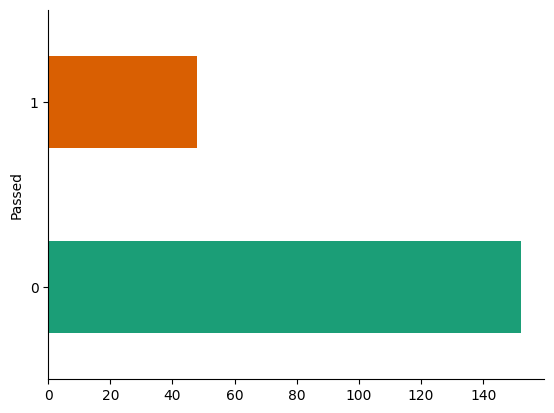

In [ ]:
# @title Passed

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('Passed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

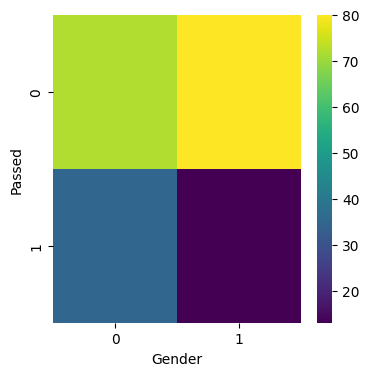

In [ ]:
# @title Gender vs Passed

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Passed'].value_counts()
    for x_label, grp in mydata.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Passed')

In [7]:
all_features = [name for name in mydata.columns if mydata[name].dtype == 'object']
all_features


['SchoolType', 'Gender', 'Passed']

In [8]:
all_features=[name for name in mydata.columns if mydata[name].dtype =='object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(all_features):
  mydata[i]=le.fit_transform(mydata[i])
for x in all_features:
  print(x," = ",mydata[x].unique())


SchoolType  =  [1 0]
Gender  =  [0 1]
Passed  =  [0 1]


In [9]:
mydata.head(10)


,SchoolType,Age,Gender,Eng,Thai,Social,Math,Sci,Passed
0,1,17,0,26,19,33,34,20,0
1,1,18,1,33,50,50,15,19,0
2,1,16,0,26,19,33,25,31,0
3,1,16,0,55,55,60,22,27,0
4,1,16,1,21,19,60,20,32,0
5,1,16,1,40,55,21,29,39,0
6,1,16,0,26,40,33,15,23,0
7,1,16,0,39,19,40,20,18,0
8,1,16,0,28,60,23,22,26,0
9,1,16,0,35,45,30,17,30,0


In [10]:
from sklearn.feature_selection import chi2
X = mydata.drop('Passed',axis=1)
y = mydata['Passed']
chi_scores = chi2(X,y)
chi_scores


(array([1.48390393e+00, 1.13544386e-02, 5.12063762e+00, 6.66410846e+00,
        3.25671357e+01, 2.30528101e+00, 3.76195290e+02, 2.35299715e+02]),
 array([2.23164713e-01, 9.15140268e-01, 2.36429279e-02, 9.83738567e-03,
        1.15145423e-08, 1.28934961e-01, 8.38141413e-84, 4.16503722e-53]))

In [11]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values


Math          8.381414e-84
Sci           4.165037e-53
Thai          1.151454e-08
Eng           9.837386e-03
Gender        2.364293e-02
Social        1.289350e-01
SchoolType    2.231647e-01
Age           9.151403e-01
dtype: float64

Text(0.5, 1.0, 'Chi2 test for feature selection')

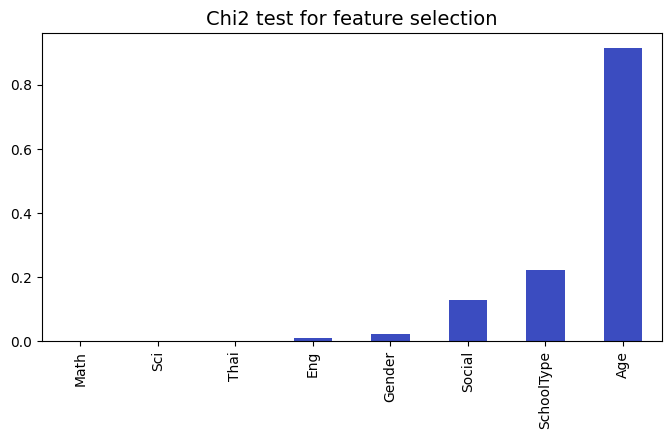

In [12]:
p_values.plot.bar(figsize = (8,4), cmap="coolwarm")
plt.title('Chi2 test for feature selection', size=14)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [14]:
from sklearn.linear_model import Lasso

best_features = Lasso(alpha=0.01)
best_features.fit(X_train, y_train)
feature_coefficients = pd.Series(best_features.coef_, index=X.columns)
selected_features = feature_coefficients[feature_coefficients != 0].index

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")


Number of selected features: 6
Selected features : ['SchoolType', 'Eng', 'Thai', 'Social', 'Math', 'Sci']


In [15]:
from sklearn.model_selection import train_test_split

#X_new = mydata[['SchoolType', 'Math', 'Sci']]

X_new = mydata[['SchoolType', 'Eng', 'Thai', 'Social', 'Math', 'Sci']]
y_new= mydata['Passed']
#splitting a dataset into training: 80 and testing: 20
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

In [12]:
#SVM classifier
from sklearn import svm

modelSVM = svm.SVC(kernel='linear') # Linear Kernel
modelSVM.fit(X_train, y_train)
y_pred = modelSVM.predict(X_test)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[29  1]
 [ 4  6]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.86      0.60      0.71        10

    accuracy                           0.88        40
   macro avg       0.87      0.78      0.81        40
weighted avg       0.87      0.88      0.87        40

0.875


In [12]:
#appendix-1
from sklearn.tree import DecisionTreeClassifier
modelDTree = DecisionTreeClassifier(random_state=100)
modelDTree.fit(X_new,y_new)
y_pred= modelDTree.predict(X_test)


In [13]:
#appendix-1
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[29  1]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.91      1.00      0.95        10

    accuracy                           0.97        40
   macro avg       0.95      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

0.975


In [16]:
#appendix-1
import xgboost as xgb
modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_new,y_new)
y_pred= modelXGB.predict(X_test)

In [17]:
#appendix-1
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[29  1]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.91      1.00      0.95        10

    accuracy                           0.97        40
   macro avg       0.95      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

0.975


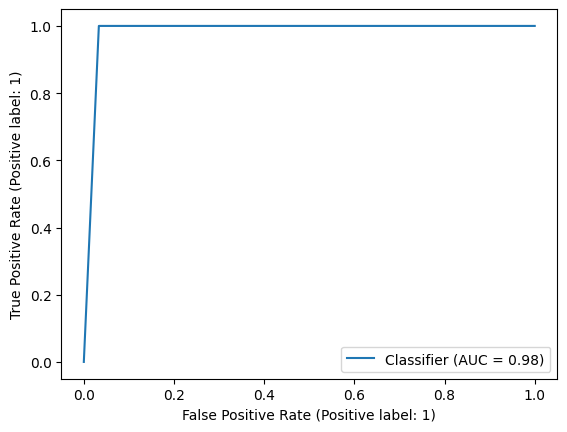

In [25]:
#appendix-2
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

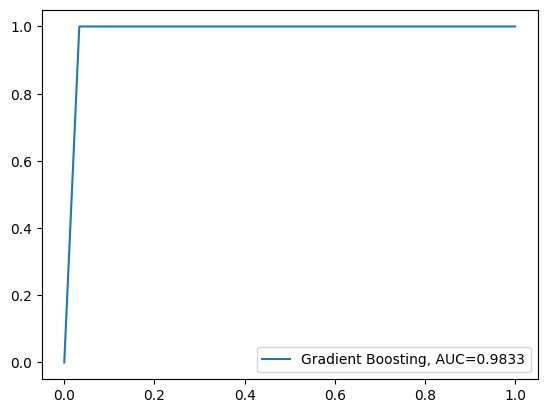

In [29]:
#appendix-2
from sklearn import metrics
#fit gradient boosted model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {
    'C': [0.1, 1, 10],                # Values of the regularization parameter
    'kernel': ['linear', 'rbf'],      # Types of kernel functions
    'gamma': ['scale', 'auto']        # Kernel coefficient for 'rbf' kernel
}

svm = svm.SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy') #cross validation
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.88125
Test Accuracy of Best Model: 0.85


In [ ]:
#re-run the SVM classifier
from sklearn.svm import SVC

modelSVM = SVC(kernel = 'rbf',gamma = 'scale', C=10) #verbose= number of epoch
modelSVM.fit(X_train, y_train)
y_pred = modelSVM.predict(X_test)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[29  1]
 [ 5  5]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.83      0.50      0.62        10

    accuracy                           0.85        40
   macro avg       0.84      0.73      0.77        40
weighted avg       0.85      0.85      0.84        40

0.85


In [ ]:
test_students= pd.read_csv('/content/sample_data/teststudents.csv')
test_students.head()

,SchoolType,Eng,Thai,Social,Math,Sci
0,0,26,19,33,34,20
1,1,50,59,45,42,20
2,0,58,60,65,22,30
3,0,49,70,55,20,30
4,0,88,35,60,25,62


In [ ]:
test_predict = modelSVM.predict(X=test_students)

In [ ]:
print(test_predict)

[0 1 0 0 1]
